In [24]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from knn_weights import *
from matplotlib.colors import ListedColormap

from space_metric import *
from knn_plot import plot_map

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
iris = datasets.load_iris()

Загружаем 2 фичи

In [26]:
X = iris.data[:, :2]
y = iris.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

metric = get_dst_metric(2)
kernel = epanchinkow_window
k = 10

Точность да данных "как есть"

In [28]:
print('accuracy: ', measure_accuracy(X_test, y_test, X_train, y_train, k, metric, kernel))

accuracy:  0.85


Теперь попробуем выкинуть лишние точки 

In [40]:
weights = remove_redundant_points(X_train, y_train, k, metric, kernel, 20)
non_zero_ids = [i for i in np.arange(weights.shape[0]) if weights[i] > 0]

reduced_x = X_train[non_zero_ids]
reduced_y = y_train[non_zero_ids]

In [41]:
print(weights[non_zero_ids])

[ 1.  1.  1.  2.  1.  1.  4. 15. 19. 18.  2.  3.  1.  2. 19. 20.  2.  6.
 20. 20. 18.  5. 20.  1. 20. 19.  1.  3.  6. 18. 20. 11.  2. 17.  4.  1.
  2.  2.  7. 20. 15. 16.  6.  1. 19. 13. 16.  1.  5.  1.  1.]


Какова точность на тех данных по "выжившим" точкам?

In [46]:
print('accuracy after: ', measure_accuracy(X_test, y_test, reduced_x, reduced_y, k, metric, kernel))

accuracy after:  0.7166666666666667


Как выглядели данные на всё пространсве до отсечения "мусора"

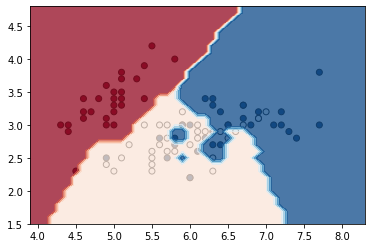

In [47]:
plot_map(X_test, y_test, X_train, y_train,  k, metric, kernel)
plt.show()

А после отсечения?

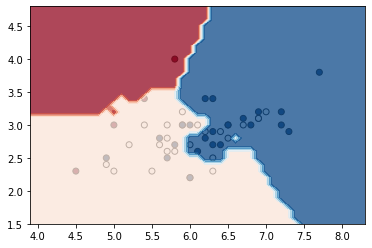

In [48]:
plot_map(X_test, y_test, reduced_x, reduced_y,  k, metric, kernel)
plt.show()

In [50]:
print('accuracy after: ', measure_accuracy(X_train, y_train, reduced_x, reduced_y, k, metric, kernel))

accuracy after:  0.6666666666666666
